<a href="https://colab.research.google.com/github/Dharmin-Shah/Machine-Learning-Projects/blob/master/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Logistic Regression

In this project I have worked with a sample <b>advertising data set</b>, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

<b>Problem</b>: To determine if the user will click on the ad or not

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

In [1]:
#Normal imports
import numpy as np
import pandas as pd

In [2]:
# Data Visualisation Libs
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#initial steps for visualization
%matplotlib inline
sns.set_style('whitegrid')

In [22]:
# Machine Learning Libs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

## Fetching and checking out the data

In [5]:
advert = pd.read_csv('https://raw.githubusercontent.com/Dharmin-Shah/Machine-Learning-Projects/master/Data/advertising.csv')

In [6]:
advert.head() # quick view of the data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [7]:
advert.info() # quick look at the rows and columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [8]:
advert.describe() # looking at the statistical info

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

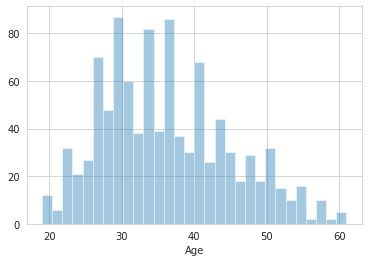

In [9]:
sns.distplot(advert['Age'],bins=30,kde=False) # A bar graph showing the age distribution

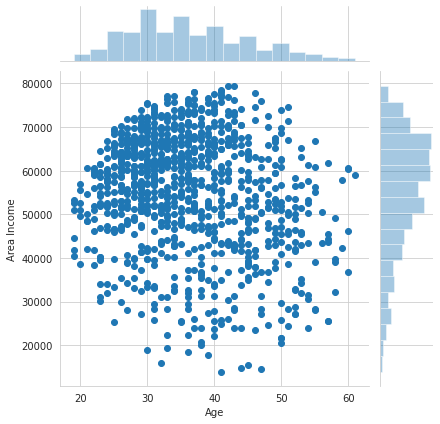

In [10]:
# Understanding the relationship betweem Age and Area Income
sns.jointplot(x='Age',y='Area Income',data=advert)

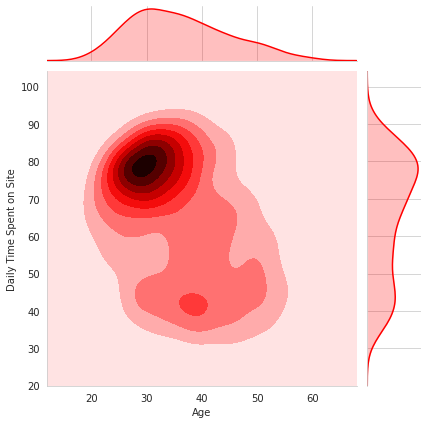

In [11]:
# Visualizing the relationship between Age and Daily Time Spent on Site
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=advert,kind='kde',color='red')     

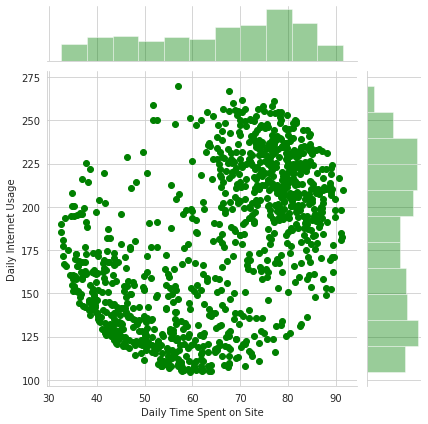

In [12]:
# Visualizing the relationship between Daily Internet Usage and Daily Time Spent on Site
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=advert,color='green') 

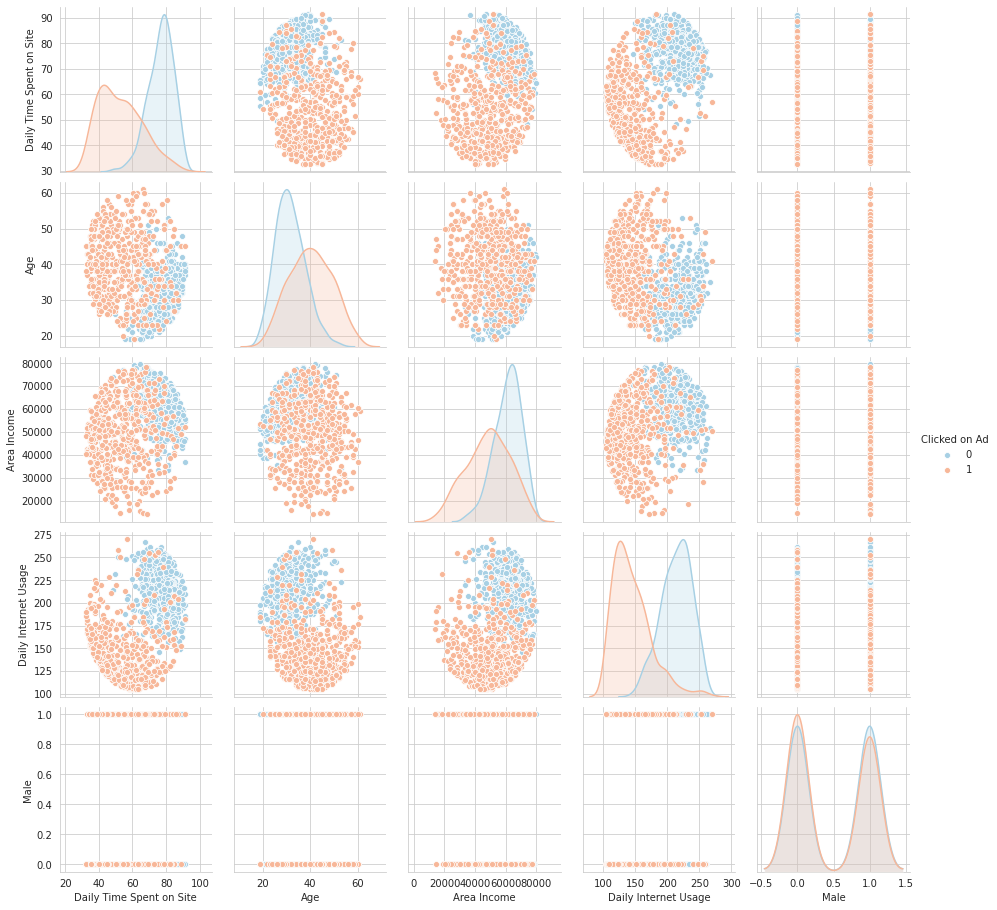

In [13]:
# A quick look at the relationship between all the columns
sns.pairplot(data=advert,hue='Clicked on Ad',palette='RdBu_r')

In [14]:
# Trying to determine if it is feasible to have Country dummy variables
advert['Country'].nunique()

237

### X and y arrays

In [15]:
X = advert[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage','Male']]

In [16]:
y = advert['Clicked on Ad']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Logistic Regression Model

In [18]:
logmodel = LogisticRegression(solver='liblinear')

In [19]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

## Predictions and Evaluations

In [20]:
predictions = logmodel.predict(X_test)

### Classification Report

In [23]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



### Confusion Matrix

In [24]:
print(confusion_matrix(y_test,predictions))

[[149   8]
 [ 15 128]]


#### We have successully trained a model to predict wether the user will click on an ad or not (given the features) with an accuray of 92%